Before starting, additional Python libraries are required to carry out the machine learning solution. Run the following section to perform the neccessary imports.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

Load the dataset stored as a CSV file. The output will contain a preview of what the raw data looks like, then another preview of transformations being performed on it to obtain more features for use in the machine learning algorithm.

In [3]:
# Load and preview dataset
energy_data = pd.read_csv("PJME_hourly.csv", parse_dates=['Datetime'], index_col='Datetime')
data_set_preview = energy_data.head()
print("---Preview of the Energy Consumption dataset for PJME---")
print(data_set_preview)

# Handle missing values by filling it with a mean value of data
energy_data['PJME_MW'].fillna(energy_data['PJME_MW'].mean())

# Extract additional features from Datetime and preview
energy_data['hour'] = energy_data.index.hour
energy_data['day'] = energy_data.index.day
energy_data['month'] = energy_data.index.month
energy_data['year'] = energy_data.index.year

data_set_datetime_preview = energy_data.head()
print("\n---Preview of the Energy Consumption dataset for PJME with Datetime features---")
print(data_set_datetime_preview)

# Split data into features and targets
x = energy_data[['hour', 'day', 'month', 'year']] #features dataframe of datetime
y = energy_data['PJME_MW']       #target series of est. megawatts

# Split into training and testing sets
# 20% into test set, 80% into training set. Set seed to 10 for consistency
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

---Preview of the Energy Consumption dataset for PJME---
                     PJME_MW
Datetime                    
2002-12-31 01:00:00  26498.0
2002-12-31 02:00:00  25147.0
2002-12-31 03:00:00  24574.0
2002-12-31 04:00:00  24393.0
2002-12-31 05:00:00  24860.0

---Preview of the Energy Consumption dataset for PJME with Datetime features---
                     PJME_MW  hour  day  month  year
Datetime                                            
2002-12-31 01:00:00  26498.0     1   31     12  2002
2002-12-31 02:00:00  25147.0     2   31     12  2002
2002-12-31 03:00:00  24574.0     3   31     12  2002
2002-12-31 04:00:00  24393.0     4   31     12  2002
2002-12-31 05:00:00  24860.0     5   31     12  2002


Create the Random Forest Regressor model and "Build the forest of Trees" from the training set. The predicted regression target of an input sample is computed as the mean predicted regression targets of the trees in the forest.

In [4]:
rfr_model = RandomForestRegressor(random_state=10)
rfr_model.fit(x_train, y_train)

y_pred = rfr_model.predict(x_test)

The minimum and maximum megawatt (MW) values are obtained from the data set for use in the calculation of error rates. The output will be the minimum and maximum MW of the dataset, the Mean Absolute Error and percentage, and the Root Mean Sqaured Error and percentage of the predictions obtained from the model.

In [5]:
min_MW = energy_data['PJME_MW'].min()
max_MW = energy_data['PJME_MW'].max()
mae = round(mean_absolute_error(y_test, y_pred), 2)
rmse = round(sqrt(mean_squared_error(y_test, y_pred)),2) 
mae_min_percent = round((mae / min_MW) * 100, 2)
mae_max_percent = round((mae / max_MW) * 100, 2)
rmse_min_percent = round((rmse / min_MW) * 100, 2)
rmse_max_percent = round((rmse / max_MW) * 100, 2)

print(f"Minimum MW: {min_MW}")
print(f"Maximum MW: {max_MW}")
print(f"Mean Absolute Error (MAE): {mae}. Percentage error: {mae_max_percent}% - {mae_min_percent}%")
print(f"Root Mean Squared Error (RMSE): {rmse}. Percentage error: {rmse_max_percent}% - {rmse_min_percent}%")

Minimum MW: 14544.0
Maximum MW: 62009.0
Mean Absolute Error (MAE): 1050.15. Percentage error: 1.69% - 7.22%
Root Mean Squared Error (RMSE): 1655.21. Percentage error: 2.67% - 11.38%


Create the visualizations of the historical data for further analysis and dtermine trends. Using multiple types of graphs, we are able to visualize various trends based on the timeframe defined such as yearly, monthly, daily, and hourly.

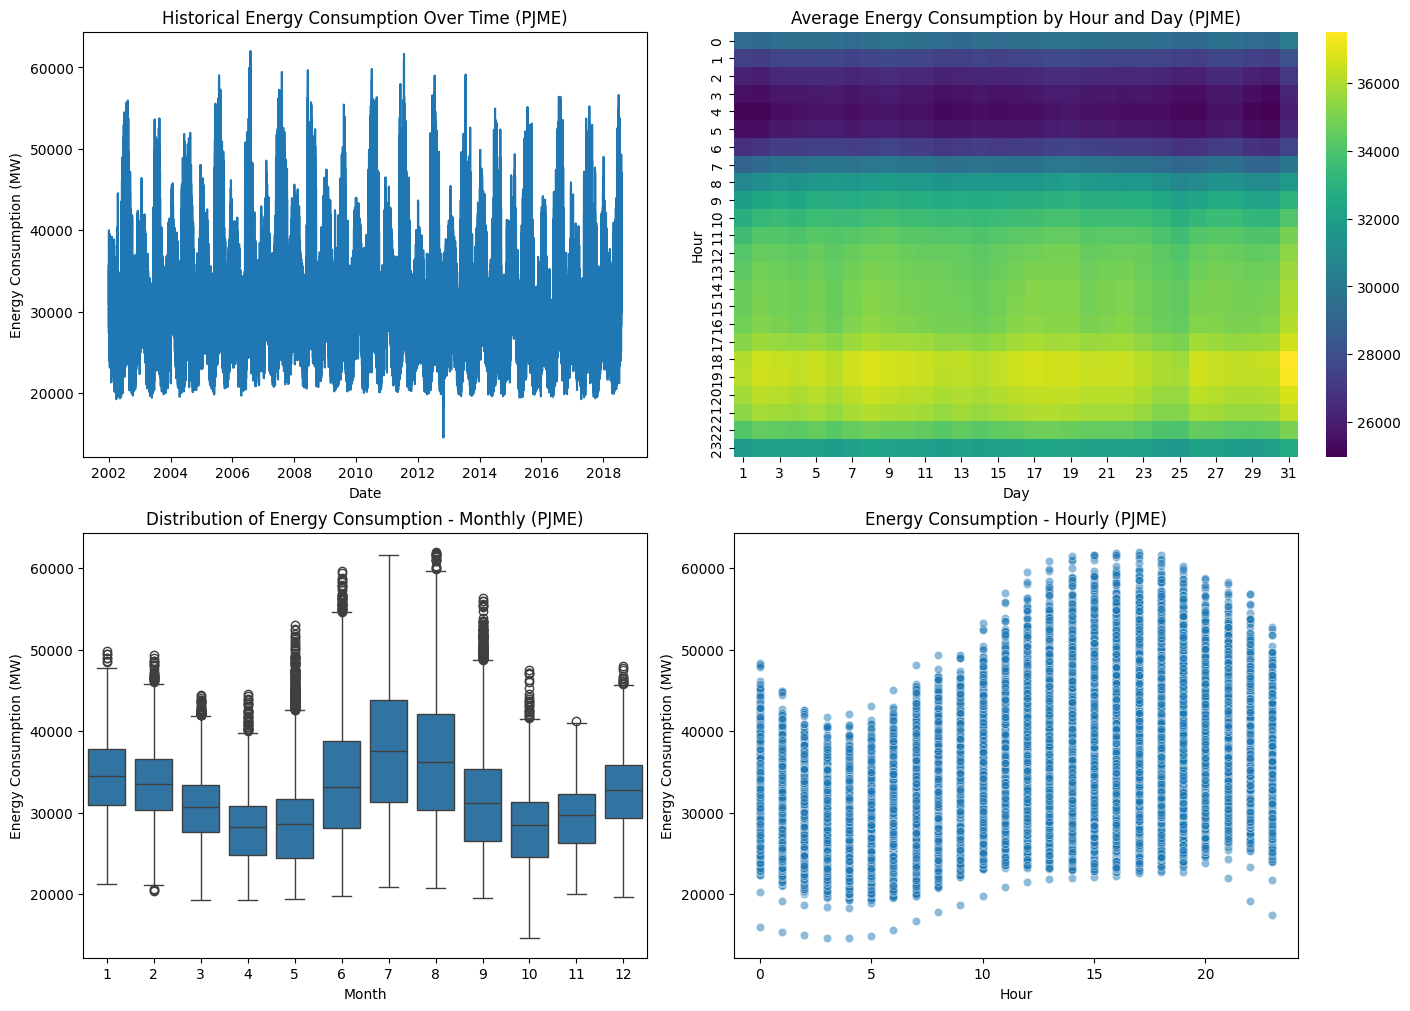

In [6]:
# Create subplots for graphing
fig, axes = plt.subplots(2, 2, figsize=(14, 10), layout="constrained")

# lineplot
sns.lineplot(ax=axes[0,0], x=energy_data.index, y='PJME_MW', data=energy_data)
axes[0,0].set_title("Historical Energy Consumption Over Time (PJME)")
axes[0,0].set_xlabel("Date")
axes[0,0].set_ylabel("Energy Consumption (MW)")

# Heatmap
pivot_table = energy_data.pivot_table(values='PJME_MW', index='hour', columns='day', aggfunc='mean')
sns.heatmap(ax=axes[0,1], data=pivot_table, cmap='viridis')
axes[0,1].set_title("Average Energy Consumption by Hour and Day (PJME)")
axes[0,1].set_xlabel("Day")
axes[0,1].set_ylabel("Hour")

# Boxplot
sns.boxplot(ax=axes[1,0], x='month', y='PJME_MW', data=energy_data)
axes[1,0].set_title("Distribution of Energy Consumption - Monthly (PJME)")
axes[1,0].set_xlabel("Month")
axes[1,0].set_ylabel("Energy Consumption (MW)")

# Scatterplot
sns.scatterplot(ax=axes[1,1], x='hour', y='PJME_MW', data=energy_data, alpha=0.5)
axes[1,1].set_title("Energy Consumption - Hourly (PJME)")
axes[1,1].set_xlabel("Hour")
axes[1,1].set_ylabel("Energy Consumption (MW)")

plt.show()

To perform a prediction of a specific date, enter a day in the future in MM/DD/YYYY format between the quotation marks.

In [7]:
date_selection = "09/15/2024"

Using the date that was entered by the user, pass it through the Random Forest Regressor model to predict the energy consumption data for that day. The output will be a table containing the megawatt usage per hour that day.

In [8]:
date_selected = date_selection.split("/")

#24 hours of a future date
forecast_energy_data = pd.DataFrame({
    'hour': [i for i in range(24)],
    'day': [date_selected[1]]*24,
    'month': [date_selected[0]]*24,
    'year': [date_selected[2]]*24
})

forecast_energy_model = rfr_model.predict(forecast_energy_data)

forecast_energy_data['PJME_MW'] = forecast_energy_model

print(f"Forecast data: \n{forecast_energy_data}")

Forecast data: 
    hour day month  year   PJME_MW
0      0  15    09  2024  28551.59
1      1  15    09  2024  26515.27
2      2  15    09  2024  25082.64
3      3  15    09  2024  24243.70
4      4  15    09  2024  23822.25
5      5  15    09  2024  23978.74
6      6  15    09  2024  25094.73
7      7  15    09  2024  28290.58
8      8  15    09  2024  29667.69
9      9  15    09  2024  31169.78
10    10  15    09  2024  32034.89
11    11  15    09  2024  33505.47
12    12  15    09  2024  34237.41
13    13  15    09  2024  36371.88
14    14  15    09  2024  37775.09
15    15  15    09  2024  38556.74
16    16  15    09  2024  39191.54
17    17  15    09  2024  39532.79
18    18  15    09  2024  39415.63
19    19  15    09  2024  38268.20
20    20  15    09  2024  37683.59
21    21  15    09  2024  36784.55
22    22  15    09  2024  34348.78
23    23  15    09  2024  31358.42


Using the prediction data obtained previously, create a line plot graph to visualize the trend of how the energy usage changes depending on the hour of the day.

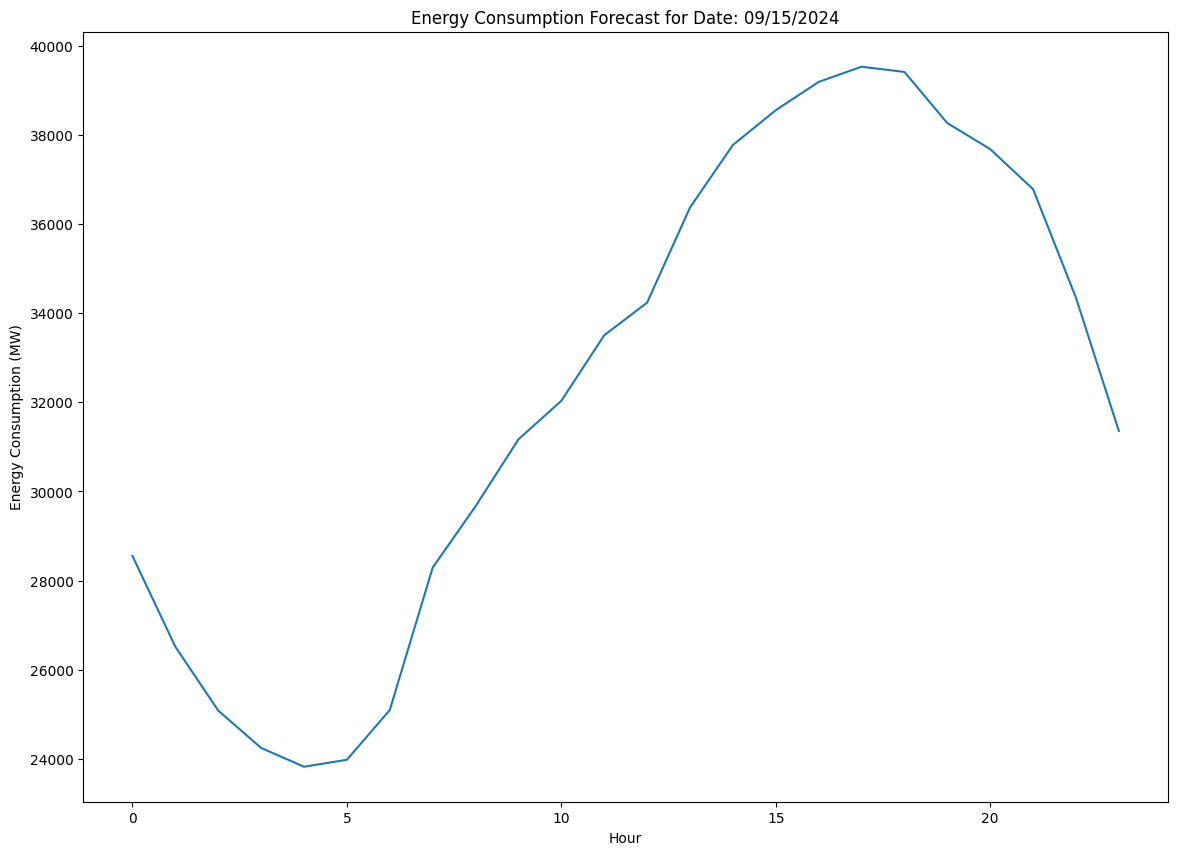

In [9]:
plt.figure(figsize=(14, 10))
sns.lineplot(x=forecast_energy_data.index, y=forecast_energy_data['PJME_MW'])
plt.title(f"Energy Consumption Forecast for Date: {date_selection}")
plt.xlabel("Hour")
plt.ylabel("Energy Consumption (MW)")

plt.show()